# Laboratory 1
# The Exponential Signal

#### Objectives

1. Get familiarized with the sympy package that's used for symbolic computation
2. Get familiarized with the exponential and complex exponential functions
3. See how the complex exponential signal is related to the sinusoidal function 

In [67]:
import sympy as sp
from sympy.plotting.plot import plot
import math

In [2]:
# Initialize this shit

# Pretty print the equation's characters
sp.init_printing(use_unicode=True)

In [8]:
# Variables
# w -> angular frequency (rad/sec)
# t -> time vector (sec)
w, t = sp.symbols("w t")

## The Exponential signal

The exponential function, in general can be written as:

$x(t) = Ce^{at}$

Where __C__ and __a__ are complex numbers of the form:

$z = \sigma + j\omega$

## The real exponential function

If we constraint the number __a__ to be real, then we have the real valued exponential function.

$x(t) = Ce^{\sigma{t}}$

If a > 0, we have the increasing exponential function.

If a < 0, we have the decreasing exponential function.

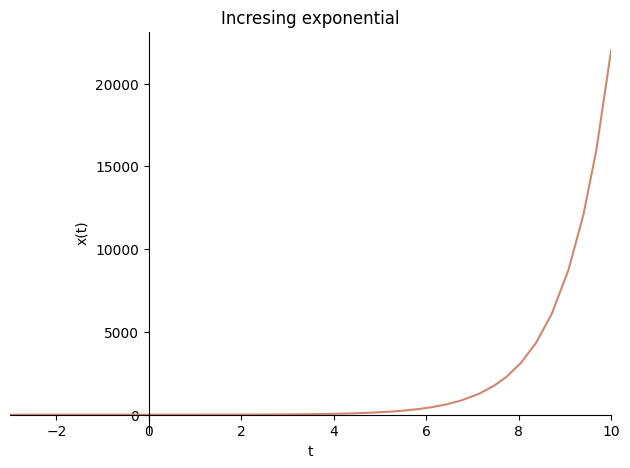

In [25]:
# Increasing exponential function
exp = sp.exp("t")

_ = plot(
    exp,
    title="Incresing exponential",
    xlabel="t",
    ylabel="x(t)",
    xlim=(-3, 10),
    line_color="#D08770"
)


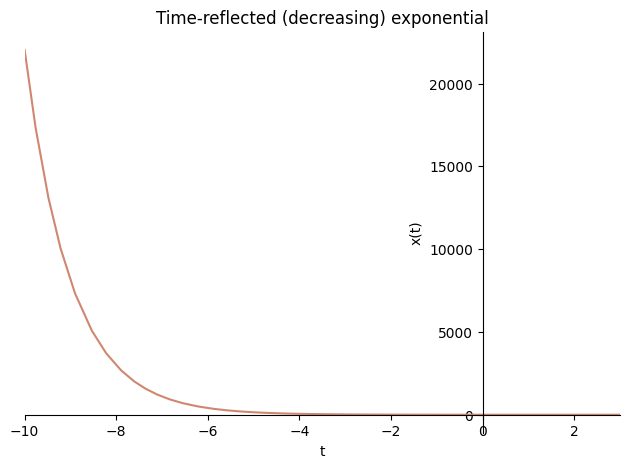

In [27]:
# Decreasing exponential function
dexp = sp.exp("-t")

_ = plot(
    dexp,
    title="Time-reflected (decreasing) exponential",
    xlabel="t",
    ylabel="x(t)",
    xlim=(-10, 3),
    line_color="#D08770"
)

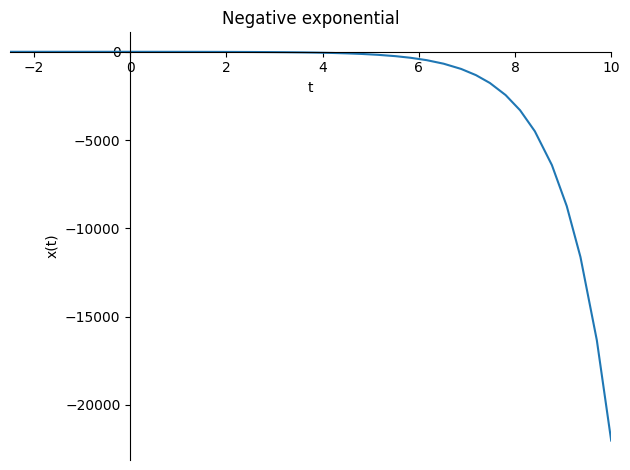

In [28]:
# ?
reversed_exp = -sp.exp("t")

_ = plot(
    reversed_exp,
    title="Negative exponential",
    xlabel="t",
    ylabel="x(t)",
    xlim=(-2.5, 10)
)

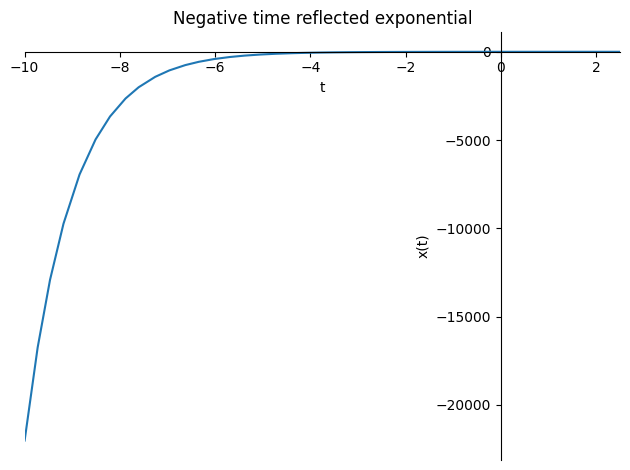

In [29]:
# Negative time reflected exponential signal

reversed_iexp = -sp.exp("-t")

_ = plot(
    reversed_iexp,
    title="Negative time reflected exponential",
    xlabel="t",
    ylabel="x(t)",
    xlim=(-10, 2.5)
)

## The complex exponential function

In the equation __(1)__ if the value of __a__ is imaginary, then we have the complex exponential function:

$Ce^{j\omega{t}}$

Which can be express as the sum of a cosine and a sine function using the _Euler_ identity:

$e^{jw_0t} = C(cos{w_ot} + jsin{w_ot})$

From this equation we can see that:

$ cos{w_0t} = Re(e^{jw_0t}) $

$ sin{w_0t} = Im(e^{jw_0t}) $

__The complex exponential function as a perodic signal__

For this signal to be periodic it must meet the following property:

$x(t) = x(x + T_0)$

Where $T_0$ is the __fundamental period__ of the signal. Then we have:

$e^{j\omega_0(t + T_0)} = e^{j\omega_0t} e^{j\omega_0T_0}$

For the periodicity condition to be met then:

$e^{j\omega_0T_0} = 1$

Since:

$T_0 = \frac{2\pi}{|w_0|}$

If we simplify the expression we can see that the term $w_0$ is cancelled and we have:

$e^{j2\pi}$

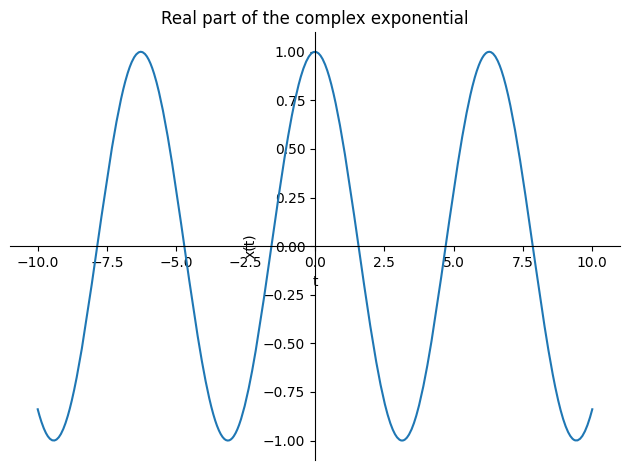

In [60]:
# The real part of the complex exponential signal is a cosine function
complex_exp = sp.exp(sp.I*t)

_ = sp.plot(
    sp.re(complex_exp),
    title="Real part of the complex exponential",
    xlabel="t",
    ylabel="x(t)"
)

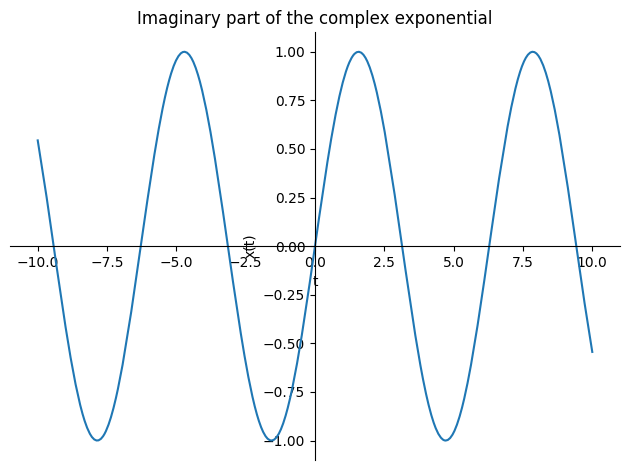

In [62]:
# The imaginary part of the complex exponential signal is a sine function

_ = sp.plot(
    sp.im(complex_exp),
    title="Imaginary part of the complex exponential",
    xlabel="t",
    ylabel="x(t)",
)

## The sinusoidal signal

$x(t) = Acos(\omega_0t + \phi)$

Where:

$A$ is the signal's amplitude.

$\omega_0$ is the __angular frequency__ in [$\frac{rads}{sec}$] units.

Also, the angular frequency can be written in terms of the __frequency__:

$\omega_0 = 2\pi{f_0}$

$f_0$ is the frequency in [$\frac{1}{s}$] units which are called Hertz [Hz]

Also, the frequency can be expressed in terms of the signal's __fundamental period__ $T_0$:

$f_0 = 1/T_0$

We can control the sinusoidal's rate of oscillation just by modifiyng the __fundamental period__ which is inversely proportional to the __frequency__.

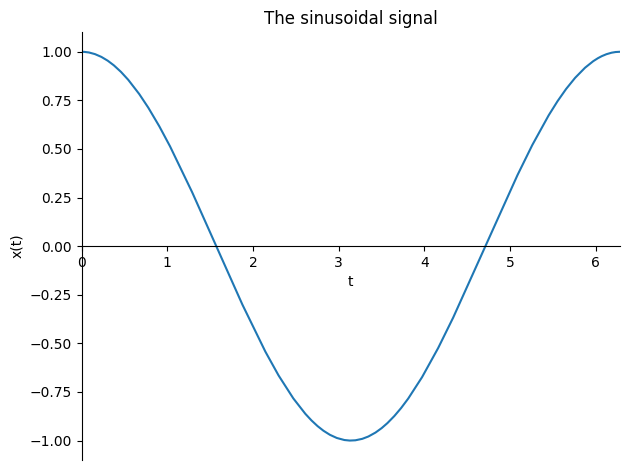

The signal's fundamental period is 6.283185307179586 [s]


In [77]:
# Frequency
f0 = 1/(2*math.pi)
# Angular frequency (oscillation rate)
w0 = 2*math.pi*f0
# Phase (rads)
phi = 0

sinusoid = sp.cos(w0*t + phi)

_ = plot(
    sinusoid,
    title="The sinusoidal signal",
    xlabel="t",
    ylabel="x(t)",
    xlim=(0, 2*math.pi)
)

# The signal's fundamental period
T0 = (2*math.pi)/w0

print(F"The signal's fundamental period is {T0} [s]")

# The general form of the complex exponential signal

From the original equation of the exponential signal:

$x(t) = Ce^{at}$

If __C__ and __a__ are complex numbers, we can see that:

$C = |C|e^{j\phi}$

$a = r + \omega_0t$

Then we have:

$x(t) = |C|e^{j\phi}e^{r + \omega_0t}$

Expanding the second exponential:

$x(t) = |C|e^{j\phi}e^re^{\omega_0t}$

Rearranging the terms:

$x(t) = |C|e^re^{\omega_0t + \phi} $

Using the Euler identity:

$x(t) = |C|e^r[cos(\omega_0t + \phi) + jsin(\omega_0t + \phi)]$

From this equation we can see that:

- If r = 0 then x(t) is a complex exponential with cosine and sine components
- If r > 0 then x(t) is a increasing exponential times a sinusoidal signal
- If r < 0 then x(t) is a decreasing exponential times a sinusoidal signal

In [91]:
r, phi, w0 = sp.symbols("r phi w0")

complex_exp_expanded = sp.cos(w0*t + phi) + sp.I * sp.sin(w0*t + phi)


gen_complex_exp = sp.exp(sp.I*phi) * complex_exp_expanded

gen_complex_exp

In [92]:
# TODO : Plot this signal for r = 0, r > 0 and r < 0

# Conclusions

- The complex exponential signal is a function that has a finite amount of power and infinite energy
- The complex exponential signal can be used to model systems where the energy is conserved:
  - Natural response of an LC circuit
  - Harmonic motion of a spring-mass mechanical system attached to a stationary support
- The complex exponential signal has a finite average power that equals 1
- The complex exponential signal has a magnitude of $|e^{j\omega_0{t}}| = 1$